In [4]:
import numpy as np
import osmnx as ox
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


# Notebook for the visualisation of route with 10 points and 1 path between points 

## Defining the source and sink points for different number of points

In [34]:
source = 670854737
sink = [44254038, 44341323, 670854737, 44448306, 3161262011, 44232104, 44176183, 44532514, 1680069937, 44613980]
sink2 = [44207459, 6486583741, 44378318,44503638,  1426610333, 44299826, 44575911, 6580405252, 44587615] #44461214
sink3 = [44246400, 614974777, 44338662, 1435580845, 44314444, 44296160, 44405529, 1680069724, 44559341]

(<Figure size 800x800 with 1 Axes>, <Axes: >)

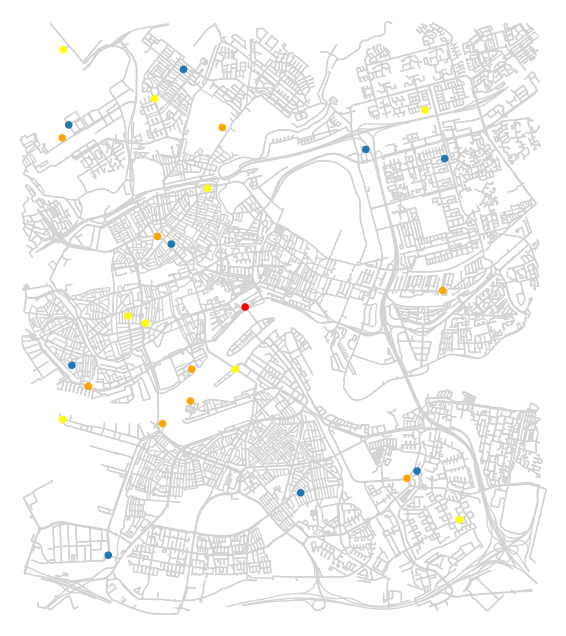

In [35]:

default_graph_file_path = "../../../graph/graph_base_case.graphml"
graph_OW_False = ox.load_graphml(default_graph_file_path)

node_colors = []
node_size = []
edge_colors = []
edge_size = []
for index in graph_OW_False.nodes():
    if index == source:
        node_colors.append('red')
        node_size.append(30)
    elif index in sink:
        node_colors.append('tab:blue')
        node_size.append(30)
    elif index in sink2:
        node_colors.append('yellow') 
        node_size.append(30)
    elif index in sink3:
        node_colors.append('orange')
        node_size.append(30)
    else:
        node_colors.append("lightgray")
        node_size.append(0)


file_path = "OA5LP1RP1OW1HS0.1TA5.png"


ox.plot.plot_graph(
    graph_OW_False,
    bgcolor="white", 
    node_color=node_colors, 
    node_size=node_size, 
    edge_linewidth=1,
    edge_color="lightgray",
    show=False, save=False, filepath=file_path
)

## Source and sink points used in 10 points

In [5]:
source = 670854737
sink = [44254038, 44341323, 670854737, 44448306, 3161262011, 44232104, 44176183, 44532514, 1680069937, 44613980]

default_graph_file_path = "../../../graph/graph_base_case.graphml"
graph_OW_False = ox.load_graphml(default_graph_file_path)

In [6]:
os.listdir('data')

['number_of_paths1OA1LP0.1RP0.1OW1HS0.1TA1.npy',
 'number_of_paths1OA1LP0.1RP0.1OW1HS0.1TA5.npy',
 'number_of_paths1OA1LP0.1RP0.1OW1HS1TA1.npy',
 'number_of_paths1OA1LP0.1RP0.1OW1HS1TA5.npy',
 'number_of_paths1OA1LP0.1RP0.1OW5HS0.1TA1.npy',
 'number_of_paths1OA1LP0.1RP0.1OW5HS0.1TA5.npy',
 'number_of_paths1OA1LP0.1RP0.1OW5HS1TA1.npy',
 'number_of_paths1OA1LP0.1RP0.1OW5HS1TA5.npy',
 'number_of_paths1OA1LP0.1RP1OW1HS0.1TA1.npy',
 'number_of_paths1OA1LP0.1RP1OW1HS0.1TA5.npy',
 'number_of_paths1OA1LP0.1RP1OW1HS1TA1.npy',
 'number_of_paths1OA1LP0.1RP1OW1HS1TA5.npy',
 'number_of_paths1OA1LP0.1RP1OW5HS0.1TA1.npy',
 'number_of_paths1OA1LP0.1RP1OW5HS0.1TA5.npy',
 'number_of_paths1OA1LP0.1RP1OW5HS1TA1.npy',
 'number_of_paths1OA1LP0.1RP1OW5HS1TA5.npy',
 'number_of_paths1OA1LP1RP0.1OW1HS0.1TA1.npy',
 'number_of_paths1OA1LP1RP0.1OW1HS0.1TA5.npy',
 'number_of_paths1OA1LP1RP0.1OW1HS1TA1.npy',
 'number_of_paths1OA1LP1RP0.1OW1HS1TA5.npy',
 'number_of_paths1OA1LP1RP0.1OW5HS0.1TA1.npy',
 'number_of_paths

### Calculate the nodes that are in routes and the frequency of the used edges

In [7]:
nodes_in_routes = []

for filename in os.listdir('data'):
    routes = np.load('data/' + filename, allow_pickle=True)
    
    for route in routes:
        for i in range(0, len(route) - 2):
            nodes_in_routes.append(route[i])
            if 'frequency' in graph_OW_False[route[i]][route[i+1]].get(0):
                frequency = graph_OW_False[route[i]][route[i+1]].get(0)['frequency']
                nx.set_edge_attributes(graph_OW_False, {(route[i], route[i+1], 0): {'frequency': frequency + 1}})
            else:
                nx.set_edge_attributes(graph_OW_False, {(route[i], route[i+1], 0): {'frequency': 1}})
                
            if graph_OW_False.has_edge(route[i+1], route[i]):
                if 'frequency' in graph_OW_False[route[i+1]][route[i]].get(0):
                    frequency = graph_OW_False[route[i+1]][route[i]].get(0)['frequency']
                    nx.set_edge_attributes(graph_OW_False, {(route[i+1], route[i], 0): {'frequency': frequency + 1}})
                else:
                    nx.set_edge_attributes(graph_OW_False, {(route[i+1], route[i], 0): {'frequency': 1}})
            
        nodes_in_routes.append(route[-1])

### Calculate frequency distribution

In [11]:
data_set = []
for (u, v, data) in graph_OW_False.edges(data=True):
    if 'frequency'in data:
        data_set.append(data['frequency'])

In [12]:
df = pd.DataFrame(data_set)

In [13]:
df.describe()

,0
count,4749.000000
mean,19.142767
std,32.351622
min,1.000000
25%,4.000000
50%,10.000000
75%,23.000000
max,486.000000


In [14]:
# sort valeus
df = df.sort_values(by = [0],  ascending=True)

# use your code but on a transposed dataframe
new = np.array_split(df.T, 5) # split columns into 5 bins

dfs = [new[i].T for i in range(len(new))]

Text(0, 0.5, 'Frequency')

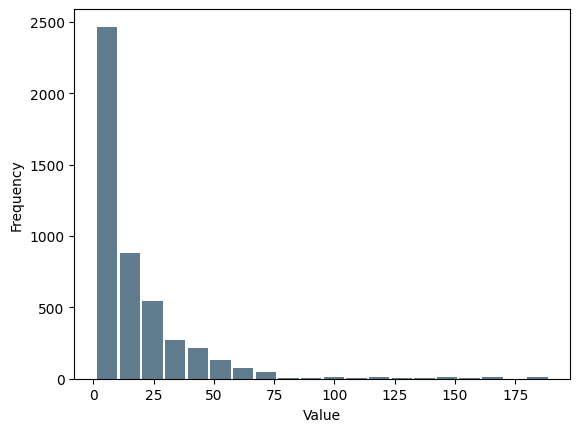

In [15]:
fig, ax = plt.subplots()
ax.hist(df[df[0] < 200], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

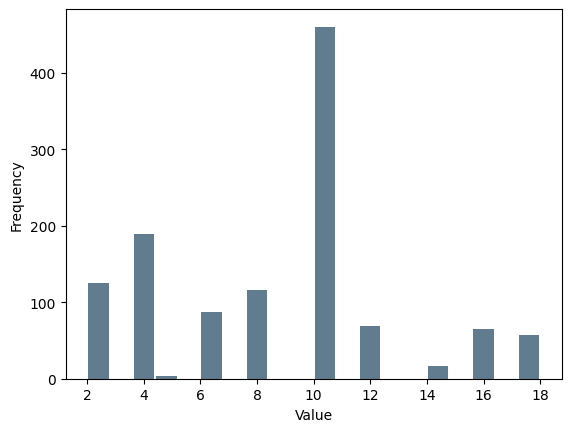

In [69]:
fig, ax = plt.subplots()
ax.hist(df[df[0] < 20], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

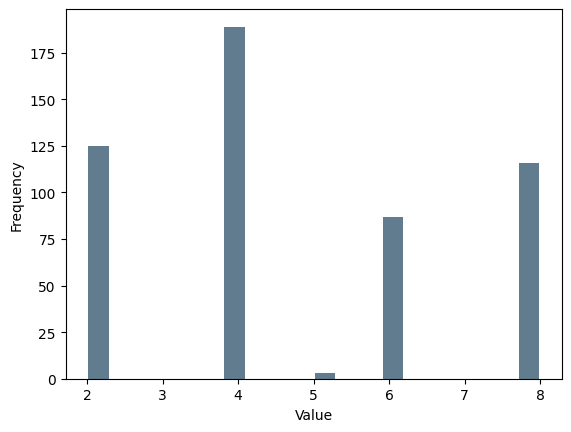

In [68]:

fig, ax = plt.subplots()
ax.hist(df[df[0] < 10], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

### Create heatmap based on frequency distribution

In [9]:
lst = [50,100,200,300,400,500,600]
palette = sns.color_palette("inferno_r", 7)

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


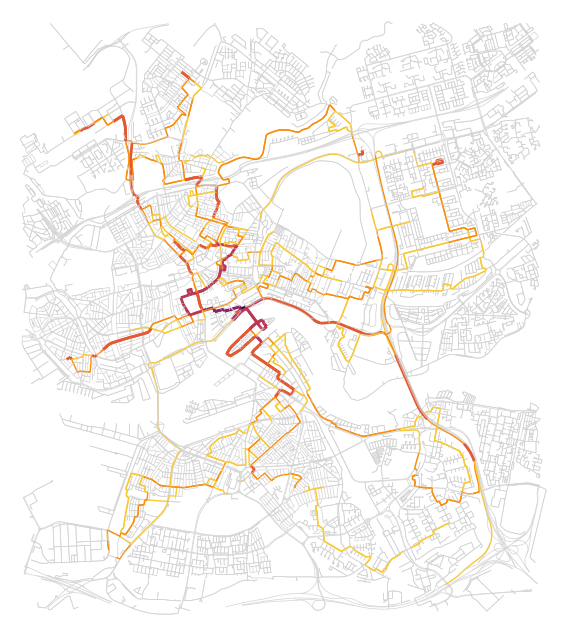

In [33]:
edge_colors = []
edge_size = []

for (u, v, data) in graph_OW_False.edges(data=True):
    if 'frequency'in data:
        if data['frequency'] < 10:
            edge_colors.append('lightgray')
            edge_size.append(0.5)
        elif data['frequency'] < 23:
            edge_colors.append(palette[0])
            edge_size.append(1)
        elif data['frequency'] < 50:
            edge_colors.append(palette[1])
            edge_size.append(1)
        elif data['frequency'] < 100:
            edge_colors.append(palette[2])
            edge_size.append(2)
        elif data['frequency'] < 250:
            edge_colors.append(palette[3])
            edge_size.append(2)
        elif data['frequency'] < 350:
            edge_colors.append(palette[4])
            edge_size.append(2)
        elif data['frequency'] < 400:
            edge_colors.append(palette[5])
            edge_size.append(2)
        else:
            edge_colors.append(palette[6])
            edge_size.append(2)
    else:
        edge_colors.append('lightgray')
        edge_size.append(0.5)
        
file_path = '10_points_1_path_heat_map.png'
fig, ax = ox.plot_graph(
            graph_OW_False, bgcolor="white", node_color="blue", node_size=0, edge_linewidth=edge_size, edge_color=edge_colors,
            save=True, filepath=file_path
            )